In [42]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [43]:
df = pd.read_csv('/home/devjith/Luminar/Machine Learning/files/heart.csv')


In [44]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    1
chol        0
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       0
ca          2
thal        1
target      0
dtype: int64

In [45]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())

df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])

df['thalach'] = df['thalach'].fillna(df['thalach'].mean())

df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [46]:
x = df.iloc[:,:-1].values

In [47]:
y = df.iloc[:,-1].values


In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [49]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)

x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

0.8376623376623377


In [55]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance']
}

grid = GridSearchCV(knn,param,cv=10,scoring='accuracy')
grid.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [56]:
grid.best_params_

{'n_neighbors': 9, 'weights': 'distance'}

In [58]:
model2 = KNeighborsClassifier(n_neighbors=9,weights='distance')
model2.fit(x_train,y_train)
y_pred_2 = model2.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_2))

1.0


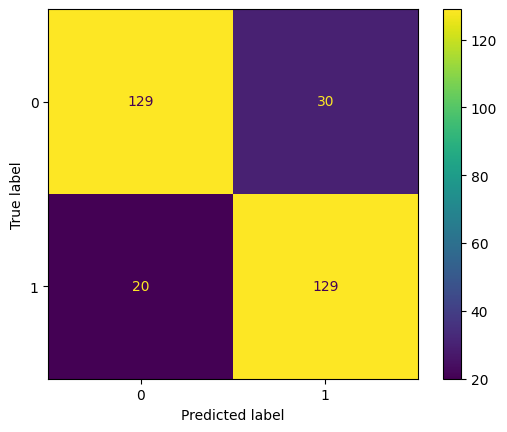

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
label = ['0','1']
cmd = ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

In [53]:
print(knn.predict(scalar.transform([[45,1,1,135,200,0,1,108,1,2.4,2,3,3]])))


[0]


In [54]:
knn.metric

'minkowski'